In [3]:
import psycopg2
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Connecting to database 

In [14]:
conn = psycopg2.connect(
    host = '165.22.22.202' ,
    database = 'gsmarena' ,
    user = 'anomaly' ,
    password = 'Hitman.agent47'    
)

### SIM ~ PRICE

#### Fetching required tables from database 

In [43]:
cur = conn.cursor()
cur.execute(''' SELECT sim."DeviceID" , sim."Name" , devices."Price"
                FROM sim
                JOIN devices 
                ON sim."DeviceID" = devices."DeviceID";''')

rows = cur.fetchall()
col_names = [desc[0] for desc in cur.description]

sim_price = pd.DataFrame(rows, columns=col_names)

In [44]:
sim_price

,DeviceID,Name,Price
0,2367,Single,100 EUR
1,2369,Single,110 EUR
2,2336,Single,60 EUR
3,2392,Single,330 EUR
4,2371,Single,130 EUR
...,...,...,...
2263,4097,Mini-SIM,210 EUR
2264,2742,Mini-SIM,150 EUR
2265,4096,Mini-SIM,120 EUR
2266,2743,Mini-SIM,220 EUR


In [45]:
cur.close()
conn.close()

#### Cleaning the table

In [48]:
prices = [] 
for price in sim_price['Price'] :
    prices.append(price.split(' ')[0])

sim_price['Price'] = prices
sim_price['Price'] = sim_price['Price'].astype('int')

In [52]:
sim_price['Name'].unique()

array(['Single', 'Dual', 'Nano-SIM', 'Micro-SIM', 'Mini-SIM', 'SIM,',
       'eSIM', 'Nano-SIM,', 'Triple', 'H542Dual', 'MIni-SIM'],
      dtype=object)

In [61]:
sim_price.loc[sim_price['Name'] == 'MIni-SIM' , 'Name'] = 'Mini-SIM'

In [64]:
sim_price['Name'].unique()

array(['Single', 'Dual', 'Nano-SIM', 'Micro-SIM', 'Mini-SIM', 'SIM,',
       'eSIM', 'Nano-SIM,', 'Triple', 'H542Dual'], dtype=object)

In [65]:
sim_price['Name'].value_counts()

Name
Dual         1067
Single        412
Micro-SIM     343
Nano-SIM      261
Mini-SIM      152
eSIM           19
SIM,            6
Nano-SIM,       6
Triple          1
H542Dual        1
Name: count, dtype: int64

we had mistake in cleaning scraped data and find wrong SIM type for our devices 

#### reclean scraped data and make a new device_SIM table 

In [4]:
devices_df = pd.read_csv('../data cleaning/Devices.csv')
device_sim = pd.read_csv('../data cleaning/fixedSIM_df.csv')

In [5]:
device_sim.rename(columns={'device':'DeviceName'} , inplace=True)

In [6]:
devices_df

,Unnamed: 0,DeviceName,BatterymAh,Price,Chipset,GPU,DisplayType,BrandName,GPRS,EDGE,...,OS,CPUCoreCount,MainCamera,SelfieCamera,LoudSpeaker,Jack35,WLAN,NFC,Bluetooth,ScreenToBodyRatio
0,0,1,2000,60 EUR,Mediatek MT6739 (28 nm),PowerVR GE8100,TFT,alcatel409,False,False,...,Android 8.1 Oreo,4.0,Single,Single,True,True,Wi-Fi 802.11 b/g/n,False,4.2,71.4
1,1,1 (2021),2000,60 EUR,Mediatek MT6739 (28 nm),PowerVR GE8100,TFT,alcatel409,False,False,...,Android 11,4.0,Single,Single,True,True,Wi-Fi 802.11 b/g/n,False,4.2,71.4
2,2,1 Plus,2500,80 EUR,Mediatek MT6739WW (28 nm),PowerVR GE8100,IPS,Nokia576,False,False,...,Android 9.0 Pie,4.0,Single,Single,True,True,Wi-Fi 802.11 a/b/g/n,False,4.2,75.1
3,3,1.3,3000,170 EUR,Qualcomm QM215 Snapdragon 215 (28 nm),Adreno 308,IPS,Nokia576,False,False,...,Android 10,4.0,Single,Single,True,True,Wi-Fi 802.11 b/g/n,False,4.2,77.6
4,4,1.4,4000,90 EUR,Qualcomm QM215 Snapdragon 215 (28 nm),Adreno 308,IPS,Nokia576,False,False,...,Android 10,4.0,Dual,Single,True,True,Wi-Fi 802.11 b/g/n,False,4.2,80.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2320,nubia Z7 Max,3100,240 EUR,Qualcomm MSM8974AC Snapdragon 801 (28 nm),Adreno 330,IPS,ZTE369,False,False,...,Android 4.4.2,4.0,Single,Single,True,True,Wi-Fi 802.11 a/b/g/n/ac,True,4.0,71.1
2321,2321,nubia Z7 mini,2300,180 EUR,Qualcomm MSM8974AA Snapdragon 801 (28 nm),Adreno 330,IPS,ZTE369,False,False,...,Android 4.4.2,4.0,Single,Single,True,True,Wi-Fi 802.11 a/b/g/n/ac,False,4.0,69.3
2322,2322,nubia Z9,2900,350 EUR,Qualcomm MSM8994 Snapdragon 810 (20 nm),Adreno 430,IPS,ZTE369,False,False,...,Android 5.2,8.0,Single,Single,True,True,Wi-Fi 802.11 a/b/g/n/ac,True,4.1,74.0
2323,2323,nubia Z9 Max,2900,200 EUR,Qualcomm MSM8994 Snapdragon 810 (20 nm),Adreno 430,IPS,ZTE369,False,False,...,Android 5.0.2,8.0,Single,Single,True,False,Wi-Fi 802.11 a/b/g/n/ac,True,4.1,70.3


In [7]:
sim_price = devices_df.merge(device_sim , on = 'DeviceName')[['DeviceName' , 'Price' , 'SIM']].drop_duplicates(keep='first')
sim_price

,DeviceName,Price,SIM
0,1,60 EUR,Nano-SIM
2,1,60 EUR,Micro-SIM
3,1 (2021),60 EUR,Nano-SIM
4,1 Plus,80 EUR,Nano-SIM
5,1.3,170 EUR,Nano-SIM
...,...,...,...
2316,nubia Z7 Max,240 EUR,Micro-SIM
2317,nubia Z7 mini,180 EUR,Micro-SIM
2318,nubia Z9,350 EUR,Nano-SIM
2319,nubia Z9 Max,200 EUR,Nano-SIM


#### Convert Price from object into int 

In [8]:
prices = [] 
for price in sim_price['Price'] :
    prices.append(price.split(' ')[0])

sim_price['Price'] = prices
sim_price['Price'] = sim_price['Price'].astype('int')

In [9]:
sim_price['SIM'].unique()

array(['Nano-SIM', 'Micro-SIM', 'eSIM', 'Mini-SIM'], dtype=object)

In [10]:
sim_price['SIM'].value_counts()

SIM
Nano-SIM     1425
Micro-SIM     605
Mini-SIM      214
eSIM           63
Name: count, dtype: int64

### Normality & Homogeneity 

/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

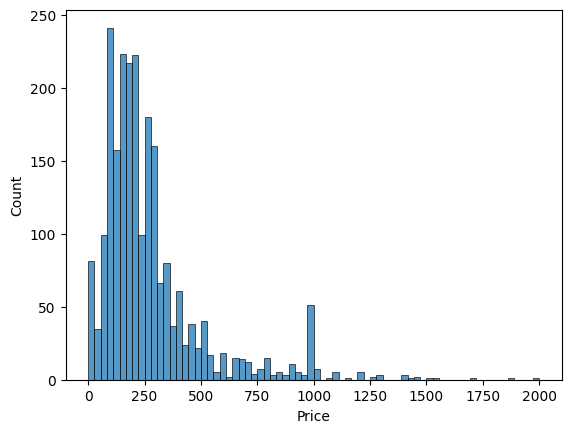

In [26]:
sns.histplot(sim_price['Price'])

In [30]:
from scipy.stats import normaltest , levene , f_oneway

In [31]:
stat_dagostino, p_value_dagostino = normaltest(sim_price['Price'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

D'Agostino-Pearson Test of : Statistics=1166.069583696845, p-value=6.183112417166388e-254


In [32]:
_, p_value_leneve = levene(
    sim_price[sim_price['SIM'] == 'Nano-SIM']['Price'],
    sim_price[sim_price['SIM'] == 'Micro-SIM']['Price'],
    sim_price[sim_price['SIM'] == 'eSIM']['Price'],
    sim_price[sim_price['SIM'] == 'Mini-SIM']['Price']
)
p_value_leneve

7.497598869446906e-52

Normality and Homogeneity are not met for this data 

#### Make data normal 

In [42]:
from scipy.stats import yeojohnson , boxcox 

In [39]:
yeojohnson(sim_price['Price'])[1]

0.3594151360954414

In [38]:
sim_price['Normal_price'] = yeojohnson(sim_price['Price'])[0]

/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Normal_price', ylabel='Count'>

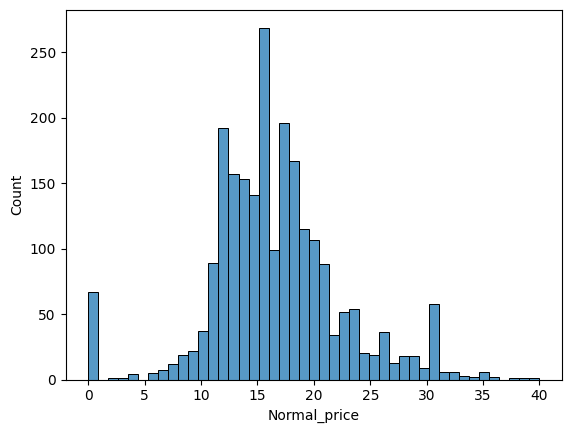

In [41]:
sns.histplot(sim_price['Normal_price'])

In [40]:
stat_dagostino, p_value_dagostino = normaltest(sim_price['Normal_price'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

D'Agostino-Pearson Test of : Statistics=103.87477962540903, p-value=2.778933792220195e-23


In [46]:
sim_price['Normal_price'] = boxcox(sim_price['Price']+1)[0]

/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Normal_price', ylabel='Count'>

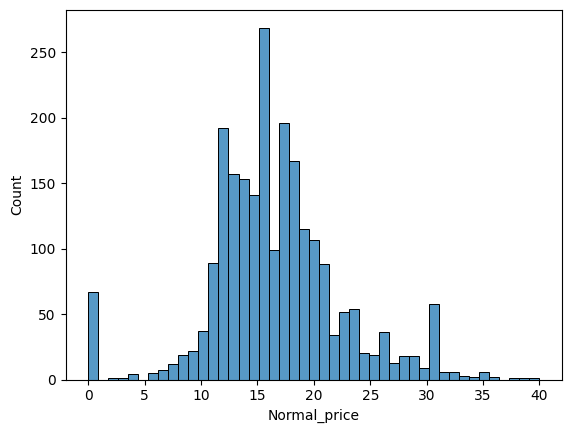

In [47]:
sns.histplot(sim_price['Normal_price'])

In [48]:
stat_dagostino, p_value_dagostino = normaltest(sim_price['Normal_price'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

D'Agostino-Pearson Test of : Statistics=103.87477962540899, p-value=2.7789337922202556e-23


In [50]:
sim_price['Normal_price'] = np.log(sim_price['Price']+1)

/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Normal_price', ylabel='Count'>

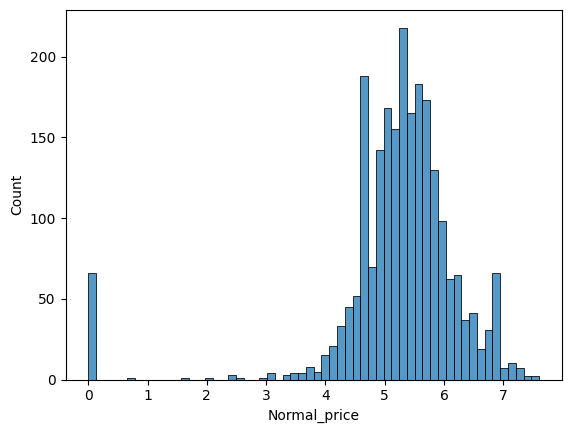

In [51]:
sns.histplot(sim_price['Normal_price'])

In [52]:
stat_dagostino, p_value_dagostino = normaltest(sim_price['Normal_price'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

D'Agostino-Pearson Test of : Statistics=1349.3949230102016, p-value=9.607613289346455e-294


In [54]:
from scipy.stats import kruskal

In [56]:
statistic, p_value = kruskal(
    sim_price[sim_price['SIM'] == 'Nano-SIM']['Price'],
    sim_price[sim_price['SIM'] == 'Micro-SIM']['Price'],
    sim_price[sim_price['SIM'] == 'eSIM']['Price'],
    sim_price[sim_price['SIM'] == 'Mini-SIM']['Price']
)
p_value

1.543181273227372e-13

In [57]:
anova_result = f_oneway(
    sim_price[sim_price['SIM'] == 'Nano-SIM']['Price'],
    sim_price[sim_price['SIM'] == 'Micro-SIM']['Price'],
    sim_price[sim_price['SIM'] == 'eSIM']['Price'],
    sim_price[sim_price['SIM'] == 'Mini-SIM']['Price']
)
anova_result.pvalue

1.5226057240038718e-29

RESULT : Type of SIM does effect the price of each device 

### SIZE ~ PRICE

### Fetching required data from database 

In [15]:
cur = conn.cursor()
cur.execute(''' SELECT "DisplaySize" , "Price"
                FROM devices;''')

rows = cur.fetchall()
col_names = [desc[0] for desc in cur.description]

displaysize_price = pd.DataFrame(rows, columns=col_names)

In [16]:
displaysize_price

,DisplaySize,Price
0,6.55,999
1,6.67,49
2,6.67,999
3,6.67,990
4,6.28,0
...,...,...
4654,5.50,240 EUR
4655,5.00,180 EUR
4656,5.20,350 EUR
4657,5.50,200 EUR


#### Convert Price from object into int 

In [17]:
prices = [] 
for price in displaysize_price['Price'] :
    prices.append(price.split(' ')[0])

displaysize_price['Price'] = prices
displaysize_price['Price'] = displaysize_price['Price'].astype('int')

#### Does Price have normal distribution ?

/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

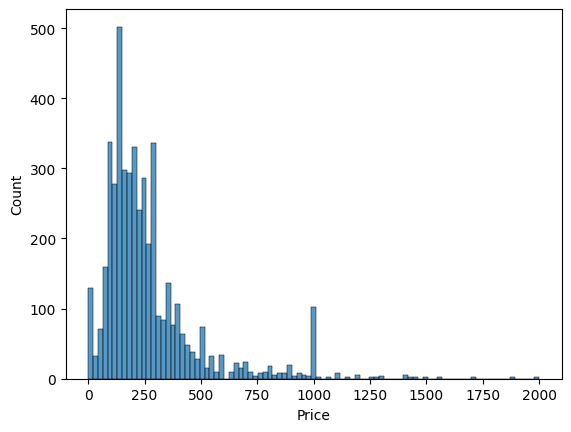

In [18]:
sns.histplot(displaysize_price['Price'])

In [19]:
from scipy.stats import shapiro , normaltest


In [20]:
stat_dagostino, p_value_dagostino = normaltest(displaysize_price['Price'])
print(f"D'Agostino-Pearson Test of : Statistics={stat_dagostino}, p-value={p_value_dagostino}")

Shapiro-Wilk Test  : Statistics=0.7589888572692871, p-value=0.0
D'Agostino-Pearson Test of : Statistics=2467.624763288633, p-value=0.0


price does not have normal distribution so we nedd to use mannwhitneyu test to understand whether the size of display effects price 

#### Split data based on their display size 

In [40]:
small_display = displaysize_price[displaysize_price['DisplaySize'] < 7 ]['Price']
big_display = displaysize_price[displaysize_price['DisplaySize'] >= 7 ]['Price']

#### U_Test

In [38]:
from scipy.stats import mannwhitneyu

In [43]:
u_statistic, p_value = mannwhitneyu(small_display, big_display )
p_value

8.37509672492774e-25

In [41]:
u_statistic, p_value = mannwhitneyu(small_display, big_display , alternative='greater')
p_value

1.0

In [42]:
u_statistic, p_value = mannwhitneyu( big_display , small_display, alternative='greater')
p_value

4.18754836246387e-25

RESULT : There is a significant difference between price of small display devices and big ones 